In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

from src.data.rgbd import load_rgbd

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

o3d.visualization.webrtc_server.enable_webrtc()

[Open3D INFO] WebRTC GUI backend enabled.


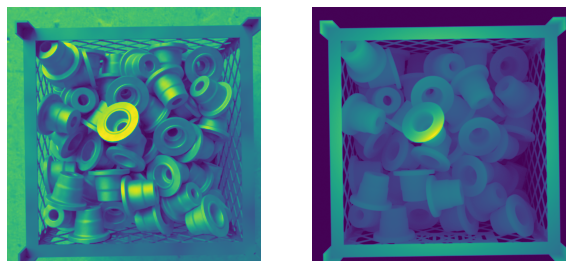

In [11]:
raw_data_dir = project_dir/'data/raw/render_results'

img_fpath = np.random.choice(list(raw_data_dir.glob('simulacao*/*.png')))

rgbd_img = load_rgbd(img_fpath, depth_scale=1)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,10)

axs[0].imshow(rgbd_img.color)
axs[1].imshow(rgbd_img.depth)

axs[0].set_axis_off()
axs[1].set_axis_off()

fig.show()

In [12]:
camera_params = o3d.camera.PinholeCameraIntrinsic(512,512,711.1111,711.1111,256,256)
# camera_params = o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_img, camera_params)
np.asarray(pcd.points)

array([[-0.03061059, -0.03061059,  0.08502941],
       [-0.03049101, -0.03061059,  0.08502941],
       [-0.03037144, -0.03061059,  0.08502941],
       ...,
       [ 0.09075561,  0.09147305,  0.25508824],
       [ 0.09111433,  0.09147305,  0.25508824],
       [ 0.09085078,  0.09085078,  0.25335294]])

In [ ]:
o3d.visualization.draw([pcd])

[Open3D INFO] Window window_3 created.
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.2550928527551479
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.2550928527551479
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.2550928527551479
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closed, peerid: 0.2550928527551479
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call


[758:318][1007421] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[758:383][1007421] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[758:388][1007421] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[758:406][1007421] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.5426611619980164
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.5426611619980164
[Open3D INFO] Sending init frames to window_3.
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /a

[764:889][1007425] (stun_port.cc:308): Port[800a4c70:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 916 bytes failed with error 11
[764:889][1007425] (stun_port.cc:308): Port[800a4c70:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 913 bytes failed with error 11
[764:889][1007425] (stun_port.cc:308): Port[800a4c70:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 913 bytes failed with error 11
[764:889][1007425] (stun_port.cc:308): Port[800a4c70:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 913 bytes failed with error 11
[764:889][1007425] (stun_port.cc:308): Port[800a4c70:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 920 bytes failed with error 11
[764:889][1007425] (stun_port.cc:308): Port[800a4c70:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 920 bytes failed with error 11
[764:889][1007425] (stun_port.cc:308): Port[800a4c70:0:1:0:local:Net[enp5s0:150.162.14.x/24:Un

[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.6698929229758399
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.6698929229758399
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.6698929229758399
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closed, peerid: 0.6698929229758399
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.34671896386009715
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.34671896386009715
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.34671896386009715
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closed, peerid: 0.34671896386009715


[798:071][1007425] (stun_port.cc:96): Binding request timed out from 150.162.14.x:42395 (enp5s0)
